# Klasifikasi Tingkat Resiko Kehamilan pada Ibu Mengandung Menggunakan Algoritma Naive Bayes: Studi Kasus pada Dataset Puskesmas Malaka Jaya

In [2589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB

## Metadata

- Dataset yang digunakan merupakan data kesehatan ibu hamim yang diambil dari puskesmas malaka jaya pada tahun 2022. 
- Dataset ini berukuran yaitu 832 Baris dan 25 kolom dari A - Y.
- Dataset ini terdiri dari 25 attributes.
- Dataset ini terdiri dari 24 features dan 1 data target yaitu TINGKAT RESIKO KEHAMILAN.
- Dataset ini dapat digunakan untum melakukan klasifikasi resiko kehamilan pada ibu yang sedang mengandung.
- Data targetnya dapat dikategorikan yaitu beresiko dan tidak beresiko.

## Exploratory Data Analysis

In [2590]:
dataset = pd.read_excel('KESEHATAN IBU HAMIL 2022.xlsx')

In [2591]:
dataset

NO              TANGGAL          NO REGISTER PASIEN BARU/LAMA  \
0      1  2022-03-01 00:00:00               002/22             Baru   
1      2                  NaN               165/21             Lama   
2      3                  NaN               132/21             Lama   
3      4                  NaN               195/21             Lama   
4      5                  NaN               169/21             Lama   
5      6                  NaN               185/21             Lama   
6      7                  NaN               001/22             Baru   
7      8  2022-06-01 00:00:00               188/21             LAMA   
8      9                  NaN               008/22             BARU   
9     10                  NaN               009/22             BARU   
10    11  2022-07-01 00:00:00               134/21             LAMA   
11    12                  NaN               009/22             LAMA   
12    13                  NaN               200/21             LAMA   
13    14                  NaN                10/22             BARU   
14    15  2022-10-01 00:00:00               144/21             LAMA   
15    16                  NaN               138/21             LAMA   
16    17                  NaN               150/21             LAMA   
17    18                  NaN               134/21             LAMA   
18    19                  NaN               136/21             LAMA   
19    20  2022-11-01 00:00:00               184/21             LAMA   
20    21                  NaN                15/22             BARU   
21    22                  NaN                 8/22             LAMA   
22    23            13/1/2022                 8/22             LAMA   
23    24                  NaN               163/21             LAMA   
24    25                  NaN               149/21             LAMA   
25    26                  NaN               164/21             LAMA   
26    27                  NaN               134/21             LAMA   
27    28            14/1/2022               197/21             LAMA   
28    29            17/1/2022               138/21             LAMA   
29    30                  NaN               155/21            LAMA    
30    31                  NaN               160/21             LAMA   
31    32                  NaN               169/21             LAMA   
32    33                  NaN               175/21             LAMA   
33    34                  NaN               136/21             LAMA   
34    35            18/1/2022               171/21             LAMA   
35    36                  NaN               188/21             LAMA   
36    37            20/1/2022                 2/22             Lama   
37    38                  NaN                22/22             BARU   
38    39            24/1/2022                26/22             BARU   
39    40                  NaN               204/21             LAMA   
40    41                  NaN               188/21             LAMA   
41    42                  NaN               138/21             LAMA   
42    43                  NaN               150/21             LAMA   
43    44                  NaN               142/21             LAMA   
44    45                  NaN               203/21             LAMA   
45    46            27/1/2022               138/21             LAMA   
46    47                  NaN                32/22             BARU   
47    48                  NaN               192/21             LAMA   
48    49                  NaN                22/22             LAMA   
49    50                  NaN                  NaN             LAMA   
50    51                  NaN               186/21             LAMA   
51    52                  NaN                34/22             BARU   
52    53                  NaN                 3/22             BARU   
53    54            28/1/2022               169/21             Lama   
54    55                  NaN                37/22             Lama   
55    56                  NaN 

In [2592]:
dataset.head()

NO              TANGGAL NO REGISTER PASIEN BARU/LAMA        NAMA BUMIL  \
0   1  2022-03-01 00:00:00      002/22             Baru       Serli Yanah   
1   2                  NaN      165/21             Lama   Shabrina Adzari   
2   3                  NaN      132/21             Lama  Yulita Anggraini   
3   4                  NaN      195/21             Lama  Sinta Nur Rahmah   
4   5                  NaN      169/21             Lama  Yulita Indriyani   

  UMUR (TAHUN)  USIA KEHAMILAN (MINGGU)  \
0           27                     38.0   
1           28                     37.0   
2           23                     38.0   
3           24                     25.0   
4           25                     34.0   

                                  ALAMAT LENGKAP KTP DKI /NON /NIK  \
0                  Jl. Mawar Merah 7/2/30 RT 1/7  3303054806950001   
1                            Jl. BR 9/135 RT 4/6  3175074102930004   
2                         JL. BR 10/1/16 RT 12/6  3175076807980006   
3                                JL NI 4 RT 10/4  3175074307970006   
4  JL. Rawadas, Gg. Madrasah RT 7/3, Pondok Kopi  1671134107960095   

  BPJS /NON BPJS / NO          NAMA SUAMI  PEKERJAAN SUAMI  \
0       0002485029532    Banyu Rahmansyah  Karyawan Swasta   
1       0000036927202     Nasruel ma'arif             Guru   
2                   -        Abdul Rianto  Karyawan Swasta   
3       0000371009002  M. Ridwan Ramadhan  Karyawan Swasta   
4                   -        Surya Suteja  Karyawan Swasta   

  ( G.. / P.. / A.. ) BB (kg) TB (cm) LiLA (cm)    HB KETERANGAN K1 MURNI  \
0              G3P2A0    66.5     150        28  11.2                   -   
1              G1P0A0    78.9     157        30   8.9                   -   
2              G1P0A0    66.2     156        27  11.7                   -   
3              G3P1A1    78.2     163        28     -                   -   
4              G1P0A0    85.6     158        28     -                   -   

  KETERANGAN K1 AKSES                 HPHT                   TP  TT  \
0                  ya  2021-06-04 00:00:00            13-1-2022  T5   
1                   -            16-4-2021            23-1-2022  T1   
2                   -  2021-11-04 00:00:00            18-1-2022  T2   
3                   -  2021-05-07 00:00:00  2022-12-04 00:00:00  T3   
4                   -  2021-05-05 00:00:00  2022-12-02 00:00:00  T0   

            FE TINGKAT RESIKO KEHAMILAN  \
0  vitamin ada                      NaN   
1  vitamin ada                      NaN   
2           10                      NaN   
3           30                      NaN   
4  Vitamin ada                      NaN   

                                          KETERANGAN  
0                                         th/ lanjut  
1  Rujuk bunda Aliyah dengan anemia dan letak obl...  
2                       Inj TD3, th/ lanjut, cek lab  
3                                                NaN  
4                                         th/ lanjut

In [2593]:
dataset.tail()

NO     TANGGAL NO REGISTER PASIEN BARU/LAMA           NAMA BUMIL  \
827  828         NaN      223/22             lama       Lhutfia Ismira   
828  829         NaN      600/22             Baru           Mut Mainah   
829  830         NaN      469/22             Lama     Ranggaini Rapama   
830  831         NaN      443/22             Lama  Lutfiani Zulkarnaen   
831  832  30/12/2022      603/22             Baru       Dini Hanifiani   

    UMUR (TAHUN)  USIA KEHAMILAN (MINGGU)  \
827           25                     27.0   
828           31                     18.0   
829           22                     37.0   
830           34                     37.0   
831           27                     40.0   

                             ALAMAT LENGKAP KTP DKI /NON /NIK  \
827              JL. Bojong Rangkong RT 8/3  3175074705970003   
828  JL. Mawar Merah 4/6/115 , RT. 003/012   3175074505910007   
829       JL. Nusa Indah 4/5/No. 193 RT 6/4  1213065810990001   
830              RSS BLOK 42 /1NO 2 RT 3/01  3175076401010006   
831       Kp. Jembatan RT 4/7, Penggilingan  3175067112950012   

    BPJS /NON BPJS / NO        NAMA SUAMI  PEKERJAAN SUAMI  \
827       0001609684795  Ramdhan Arfianto  Karyawan Swasta   
828       0001146121086       RIZKI HALIM  Karyawan Swasta   
829       0000233064911   Muhammad Sanusi  Karyawan Swasta   
830       0001291771394     Geri Setiawan  Karyawan swasta   
831       0001290157389     Muhammad Yani  Karyawan Swasta   

    ( G.. / P.. / A.. ) BB (kg) TB (cm) LiLA (cm)    HB KETERANGAN K1 MURNI  \
827              G1P0A0    54.6     152        26  12.6                   -   
828              G3P2A0    74.2     150        28     V                   -   
829              G1P0A0    78.5     151        31     -                   -   
830              G1P0A0      51     156        22     -                   -   
831              G1P0A0    78.7     154        25  11.9                 NaN   

    KETERANGAN K1 AKSES       HPHT                   TP  TT           FE  \
827                   V  20-6-2022            27-3-2023  T3           30   
828                   V  26-8-2022  2023-02-06 00:00:00  T3           30   
829                   -  15-4-2022            22-1-2023  T4           20   
830                   -  15-4-2022           22-01-2023  T5           20   
831                 NaN  21-3-2022           28-12-2022  T3  Vitamin Ada   

    TINGKAT RESIKO KEHAMILAN                                 KETERANGAN  
827                        -                SF, Kalk, Asam Folat, Vit C  
828               Riwayat SC              SF, Asam Folat, Vit. B6, Kalk  
829                        -            INJ TD, SF, Kalk, C, Asam Folat  
830                      KEK            SF, Asam Folat, Kalk, Vitamin C  
831                Post term  terapi Lanjut, Rujuk ke RSIA Bunda Aliyah

In [2594]:
dataset.sample(10)

NO              TANGGAL NO REGISTER PASIEN BARU/LAMA  \
70    71  2022-08-02 00:00:00       47/22                B   
590  591            21/9/2022      464/22             Baru   
446  447                  NaN      337/22             Baru   
379  380                  NaN      184/21             LAMA   
484  485                  NaN      406/22             Baru   
84    85            15/2/2022       61/22                B   
780  781                  NaN      557/22             Baru   
289  290                  NaN      170/22             LAMA   
460  461                  NaN      371/22             Lama   
587  588                  NaN      192/22             Lama   

                NAMA BUMIL UMUR (TAHUN)  USIA KEHAMILAN (MINGGU)  \
70   EFA FARHLU NURRAHIMAH           30                     27.0   
590     Arpi Amelia Amanda           21                      5.0   
446      Esti setyoningsih           35                     24.0   
379          Ernawati Dewi           27                      NaN   
484             Khairunisa           29                     17.0   
84   Debby Putri Anggraini           24                      9.0   
780      Rizka Dwi Safitri           19                     18.0   
289            Rona Sarina           22                     36.0   
460         Nur Komalasari           37                      8.0   
587                Marwati           40                     22.0   

                                ALAMAT LENGKAP KTP DKI /NON /NIK  \
70                  NI VI / 13/ 374 RT 9 /RW 3  3175075811910009   
590          JL. MM RT 7/11 No. 4, Pondok Kopi  3207037008010002   
446       JL Bintara jaya 7 no 54 RT 04/ RW 09  3175075706870005   
379           JL Nusa Indah 1/9/143 RT 07/RW05  3175075908940001   
484             NUSA INDAH 4 /12/102 RT 4/RW 9  3171015208920003   
84              RSS Klender Blok 2/4/14 RT 8/2  3175066501981003   
780                  JL BR III /6/24 RT 2 RW 9  3175075412020013   
289  Perum Karang Rahayu Blok A3/12 A RT 9 / 4  1611044511990002   
460             JL. Nusa Indah 1/4/87, RT 3/12  3674065601850003   
587        JL MM VII GANG 2 NO 21 RT 01/RW 007  3175076804820002   

    BPJS /NON BPJS / NO           NAMA SUAMI  PEKERJAAN SUAMI  \
70           2227000151  AULIA PUTRA PRATAMA         K SWASTA   
590       0003174502959         Robi Tazudin             PPSU   
446       0002043586348        Handa Saputra        Wirausaha   
379       0001216551374       Aditya Pradana    Pekerja Lepas   
484                   -         M Abdul azia  Karyawan swasta   
84                    -         Dedi Santoso        Wirausaha   
780       0001268007434     ERICK DWIJAYANTO  Karyawan Swasta   
289          2510367704                    -  Karyawan Swasta   
460       0001744583501       Sigit Sugiarto  Karyawan Swasta   
587       0001310783534             Bambang    Karyawan swata   

    ( G.. / P.. / A.. ) BB (kg) TB (cm) LiLA (cm)    HB KETERANGAN K1 MURNI  \
70               G1P0A0      55     159        25     -                   -   
590              G1P0A0      47     160        25     V                   -   
446              G2P1A0    48.9     147        24  11.2                   -   
379        PP HARI KE 7    53.6     156        25   NaN                   -   
484              G3P2A0    69.8   158.8        37     V                   -   
84               G2P0A1    50.9     158        25     -                   -   
780              G1P0A0      52     157      24.5    11                   -   
289              G2P0A1    75.6     165        27     -                   -   
460              G6P3A2    53.3     160        31     -                   -   
587              G3P2A0    50.6     148        22     -                   -   

    KETERANGAN K1 AKSES                 HPHT                   TP  TT  \
70                    -            29-7-2021  2022-06-05 00:00:00  T2   
590                   V            16-8-2022            23-5-2023  T2   
446                 

In [2595]:
dataset.shape

(832, 25)

In [2596]:
# Dapatkan daftar jenis semua kolom di dataset
dataset.dtypes

NO                            int64
TANGGAL                      object
NO REGISTER                  object
PASIEN BARU/LAMA             object
NAMA BUMIL                   object
UMUR (TAHUN)                 object
USIA KEHAMILAN (MINGGU)     float64
ALAMAT LENGKAP               object
KTP DKI /NON /NIK            object
BPJS /NON BPJS / NO          object
NAMA SUAMI                   object
PEKERJAAN SUAMI              object
( G.. / P.. / A.. )          object
BB (kg)                      object
TB (cm)                      object
LiLA (cm)                    object
HB                           object
KETERANGAN K1 MURNI          object
KETERANGAN K1 AKSES          object
HPHT                         object
TP                           object
TT                           object
FE                           object
TINGKAT RESIKO KEHAMILAN     object
KETERANGAN                   object
dtype: object

In [2597]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NO                        832 non-null    int64  
 1   TANGGAL                   202 non-null    object 
 2   NO REGISTER               826 non-null    object 
 3   PASIEN BARU/LAMA          831 non-null    object 
 4   NAMA BUMIL                832 non-null    object 
 5   UMUR (TAHUN)              830 non-null    object 
 6   USIA KEHAMILAN (MINGGU)   797 non-null    float64
 7   ALAMAT LENGKAP            830 non-null    object 
 8   KTP DKI /NON /NIK         829 non-null    object 
 9   BPJS /NON BPJS / NO       829 non-null    object 
 10  NAMA SUAMI                830 non-null    object 
 11  PEKERJAAN SUAMI           830 non-null    object 
 12  ( G.. / P.. / A.. )       831 non-null    object 
 13  BB (kg)                   828 non-null    object 
 14  TB (cm)   

In [2598]:
dataset.columns

Index(['NO', 'TANGGAL', 'NO REGISTER', 'PASIEN BARU/LAMA', 'NAMA BUMIL',
       'UMUR (TAHUN)', 'USIA KEHAMILAN (MINGGU)', 'ALAMAT LENGKAP',
       'KTP DKI /NON /NIK', 'BPJS /NON BPJS / NO', 'NAMA SUAMI',
       'PEKERJAAN SUAMI', '( G.. / P.. / A.. )', 'BB (kg)', 'TB (cm)',
       'LiLA (cm)', 'HB', 'KETERANGAN K1 MURNI', 'KETERANGAN K1 AKSES', 'HPHT',
       'TP', 'TT', 'FE', 'TINGKAT RESIKO KEHAMILAN', 'KETERANGAN'],
      dtype='object')

In [2599]:
dataset.isnull().sum()

NO                            0
TANGGAL                     630
NO REGISTER                   6
PASIEN BARU/LAMA              1
NAMA BUMIL                    0
UMUR (TAHUN)                  2
USIA KEHAMILAN (MINGGU)      35
ALAMAT LENGKAP                2
KTP DKI /NON /NIK             3
BPJS /NON BPJS / NO           3
NAMA SUAMI                    2
PEKERJAAN SUAMI               2
( G.. / P.. / A.. )           1
BB (kg)                       4
TB (cm)                       2
LiLA (cm)                     3
HB                           27
KETERANGAN K1 MURNI         104
KETERANGAN K1 AKSES          96
HPHT                         56
TP                           58
TT                           57
FE                           16
TINGKAT RESIKO KEHAMILAN    110
KETERANGAN                   15
dtype: int64

## Data Preprocessing

In [2600]:
kolom_to_drop = ['NO', 'TANGGAL', 'NO REGISTER','NAMA BUMIL','ALAMAT LENGKAP',
       'KTP DKI /NON /NIK', 'BPJS /NON BPJS / NO', 'NAMA SUAMI','( G.. / P.. / A.. )',
       'KETERANGAN K1 MURNI', 'KETERANGAN K1 AKSES', 'HPHT', 'TP', 'KETERANGAN']
dataset = dataset.drop(kolom_to_drop, axis=1)

In [2601]:
dataset.columns

Index(['PASIEN BARU/LAMA', 'UMUR (TAHUN)', 'USIA KEHAMILAN (MINGGU)',
       'PEKERJAAN SUAMI', 'BB (kg)', 'TB (cm)', 'LiLA (cm)', 'HB', 'TT', 'FE',
       'TINGKAT RESIKO KEHAMILAN'],
      dtype='object')

In [2602]:
dataset.isnull().sum()

PASIEN BARU/LAMA              1
UMUR (TAHUN)                  2
USIA KEHAMILAN (MINGGU)      35
PEKERJAAN SUAMI               2
BB (kg)                       4
TB (cm)                       2
LiLA (cm)                     3
HB                           27
TT                           57
FE                           16
TINGKAT RESIKO KEHAMILAN    110
dtype: int64

In [2603]:
dataset.shape

(832, 11)

In [2604]:
column = 'TINGKAT RESIKO KEHAMILAN'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values.index.tolist())

Kolom 'TINGKAT RESIKO KEHAMILAN':
['-', 'Riwayat SC', 'Riwayat sc', 'RIWAYAT SC', 'usia diatas 35 tahun', 'Usia diatas 35', 'KEK', 'BEKAS SC', 'POST SC', 'USIA DIATAS 35 THN', 'Usia >dari 35 thn', 'Usia diatas 45 tahun, ada tyroid', 'Bekas SC', 'TB dibawah 150 cm', 'Usia > 35 tahun', 'Grandemulti para', 'LILA < 23.5 . MYOPHIA', 'USIA 13 TAHUN', 'Usia diatas 35 tahun', 'HDK', 'Jarak < 2 tahun', 'TB dibawah 145 cm', 'Riwayat SC, DMG', "Riwayat Bell's Palsy", 'Anemia', 'Bekas cs', 'Riwayat SC, Anemia', 'Gemelli', 'Grandemultipara', 'Takikardi', 'Usia , Hbsag reaktif', 'Jarak kurang dari 2 tahun', 'Riwayat IUFD', 'USIA', 'Riwayat Sc', 'Hemoroid, Prot urin : +1', 'Bekas sc', 'Tinggi Badan kurang dari 150 cm', 'Suspect CPD', 'USIA 14 THN', 'Usia dibaawah 19 tahun', 'V', 'RIWAYAT SC, JARAK <2 TAHUN', 'GRANDEMULTIPARA', 'Riwayat SC, Jarak < 2 tahun, Usia > 35 tahun', 'TB < 145 cm', 'Takikardia', 'Faktor usia', 'faktor usia', 'GEMELLY', 'Usia diatas 30 thn', 'Keluar flek-flek', 'Abortus', 'Riwa

In [2605]:
# Menggantikan "-" dengan NaN dalam kolom 'TINGKAT RESIKO KEHAMILAN'
dataset['TINGKAT RESIKO KEHAMILAN'] = dataset['TINGKAT RESIKO KEHAMILAN'].replace('-', np.nan)

In [2606]:
# Menggantikan "-" dengan NaN dalam kolom 'TINGKAT RESIKO KEHAMILAN'
dataset['TINGKAT RESIKO KEHAMILAN'] = dataset['TINGKAT RESIKO KEHAMILAN'].replace('V', np.nan)

In [2607]:
# Menggantikan NaN dengan 0 dalam kolom 'TINGKAT RESIKO KEHAMILAN'
dataset['TINGKAT RESIKO KEHAMILAN'] = dataset['TINGKAT RESIKO KEHAMILAN'].fillna(0)

In [2608]:
dataset['TINGKAT RESIKO KEHAMILAN'] = dataset['TINGKAT RESIKO KEHAMILAN'].replace(['Riwayat SC', 
                                    'Riwayat sc', 'RIWAYAT SC', 'TB dibawah 150 cm',
                                    'LILA < 23.5 . MYOPHIA', 'Jarak < 2 tahun', 
                                    'TB dibawah 145 cm', 'Jarak kurang dari 2 tahun',
                                    'Riwayat Sc', 'Tinggi Badan kurang dari 150 cm', 
                                    'Riwayat SC, Jarak < 2 tahun', 'TB < 145 cm', 
                                    'RIWAYAT SC, JARAK <2 TAHUN', 'Terpasang IUD', 
                                    'Jarak kurang 2 tahun', 'MIOPI (-5,-5)', 
                                    'abortus 2x, mata kanan dan kiri minus 13 dan 12',
                                    'MYIOPIA 16.5', 'MYIOPIA 16.5, Riwayat SC', 'HB <12',
                                    'O.s memiliki suami yg terganggu kejiwaannya, OS sering mendapat keekrasan verbal dari suami',
                                    'TINGGI KURANG 150', 'LILA 22', 'miopi (-8,-8)', 'Letak bokong'                                                 
                                                                                  ], 1)

In [2609]:
dataset['TINGKAT RESIKO KEHAMILAN'] = dataset['TINGKAT RESIKO KEHAMILAN'].replace([
                                    'usia diatas 35 tahun', 'Usia diatas 35', 'KEK', 'BEKAS SC', 
                                    'POST SC', 'USIA DIATAS 35 THN', 'Usia >dari 35 thn', 
                                    'Usia diatas 45 tahun, ada tyroid', 'Bekas SC','Usia > 35 tahun',
                                    'Grandemulti para', 'USIA 13 TAHUN', 'Usia diatas 35 tahun','HDK',
                                    'Riwayat SC, DMG', "Riwayat Bell's Palsy", 'Anemia', 'Bekas cs', 
                                    'Riwayat SC, Anemia', 'Gemelli', 'Grandemultipara', 'Takikardi', 
                                    'Usia , Hbsag reaktif', 'USIA 14 THN', 'Faktor usia', 
                                    'Riwayat IUFD', 'Hemoroid, Prot urin : +1', 'Bekas sc', 
                                    'GEMELLY', 'USIA', 'Suspect CPD', 'faktor usia', 'Takikardia',
                                    'Usia dibaawah 19 tahun', 'GRANDEMULTIPARA', 'Usia > 35 tahun',
                                    'Postterm', 'USIA+ ABORTUS 2X', 
                                    'Riwayat sc, Usia diatas 35 tahun', 
                                    'Usia dibawah 20 tahun, Takikardi', 'usia ,abortus berulang',
                                    'Riwayat SC, Jarak < 2 tahun, Usia > 35 tahun', 'Abortus', 
                                    'KEPALA BELUM ,MASUK PAP', 
                                    'tidak ada gerakan janin 2 hari, hasil USG tgl 9/6/22 = Polihidramnion', 
                                    'Usia 14 thn', 'Pre eklamsia', 'Faktor usia 43 thn', 
                                    'Faktor usia 37 thn dan Grandemulti', 
                                    'Riwayat SC, Grandemultipara, Usia diatas 35 tahun', 
                                    'Riwayat SC dan Usia 38 tahun', 'Usia 40 tahun', 
                                    'abortus insipens', 'Keluar air-air tgl 2/7/22', 
                                    'PRE EKLAMSIA', 'usia diatas 35 tahun, Riwayat SC', 'Z35.9',
                                    'Susp. Abortus Imminens', 'anemia', 
                                    'Riwayat SC, Abortus Imminens', 
                                    'suah dikonsulkan dengan poli umum, cek GDP', 
                                    'Abortus Insipiens', 'Keluar flek-flek', 'Usia ditas 35 Tahun',
                                    'RIWAYAT SC, USIA DIATAS 35 THN', 'Usia diatas 30 thn', 
                                    'usia 40 tahun', 'usia 38 thn', 'usia 36 thn', 
                                    'Usia di atas 35 tahun', 
                                    'Rujuk ke RSIA Bunda A dengan takikardi', 'FAKTOR USIA', 
                                    'Riwayat SC, Grandemultipara', 
                                    'Riwayat SC, Usia diatas 35 tahun', 'SC 2x', 'KEK ',
                                    'Usia dibawah 19 tahun', 'USIA DIATAS 35 TH',
                                    'BO', '-GRANDE MULTI', 'RIWAYAT HDK', 'GAWAT JANIN', 
                                    'HBSag Reaktif', 'abortus insipiens', 
                                    'KEK, Usia diatas 35 tahun', 'USIA < 20 ', 
                                    'USIA >35 THN', 'Usia . 35 tahun', 'usia 41 tahun', 
                                    'Post term', 'Abortus iminens'
                                                                                    ], 2)

In [2610]:
column = 'TINGKAT RESIKO KEHAMILAN'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'TINGKAT RESIKO KEHAMILAN':
0    498
2    203
1    131
Name: TINGKAT RESIKO KEHAMILAN, dtype: int64


In [2611]:
column = 'PASIEN BARU/LAMA'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'PASIEN BARU/LAMA':
Lama     459
Baru     153
LAMA     109
L         45
BARU      29
B         17
baru      10
lama       6
LAMA       2
Baru       1
Name: PASIEN BARU/LAMA, dtype: int64


In [2612]:
dataset = dataset.dropna(subset=['PASIEN BARU/LAMA'])

In [2613]:
# Mengubah nilai-nilai tertentu menjadi 0 dan 1 pada kolom tertentu menggunakan replace()
dataset['PASIEN BARU/LAMA'] = dataset['PASIEN BARU/LAMA'].replace(['Lama', 'LAMA', 'L', 'lama', 
                                                                   'LAMA '], 0)
dataset['PASIEN BARU/LAMA'] = dataset['PASIEN BARU/LAMA'].replace(['Baru', 'BARU', 'B', 'baru', 
                                                                   'Baru '], 1)

In [2614]:
column = 'UMUR (TAHUN)'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'UMUR (TAHUN)':
27        87
28        68
29        54
26        51
33        49
31        49
25        44
35        43
24        38
34        36
32        35
30        33
23        29
40        27
37        27
39        25
22        22
21        22
38        16
36        12
41        10
20        10
42        10
43         7
14         6
45         5
13         4
19         4
16         2
15         1
4 Hari     1
46         1
7 HARI     1
Name: UMUR (TAHUN), dtype: int64


In [2615]:
dataset = dataset[dataset['UMUR (TAHUN)'] != '4 Hari']

In [2616]:
# Menghapus baris dengan nilai 1 pada kolom 'FE'
dataset = dataset[dataset['UMUR (TAHUN)'] != '7 HARI']

In [2617]:
dataset = dataset.dropna(subset=['UMUR (TAHUN)'])

In [2618]:
dataset['UMUR (TAHUN)'] = pd.to_numeric(dataset['UMUR (TAHUN)'], errors='coerce')

In [2619]:
column = 'USIA KEHAMILAN (MINGGU)'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'USIA KEHAMILAN (MINGGU)':
34.0    55
37.0    47
35.0    45
36.0    44
32.0    38
33.0    38
27.0    34
31.0    32
38.0    27
29.0    25
30.0    24
23.0    23
26.0    22
22.0    21
20.0    21
14.0    19
12.0    18
8.0     18
28.0    17
6.0     17
17.0    16
18.0    16
39.0    15
15.0    15
7.0     15
25.0    15
24.0    14
19.0    14
5.0     13
11.0    13
16.0    12
21.0    12
9.0     12
13.0    12
10.0     9
40.0     4
41.0     2
3.0      1
Name: USIA KEHAMILAN (MINGGU), dtype: int64


In [2620]:
dataset = dataset.dropna(subset=['USIA KEHAMILAN (MINGGU)'])

In [2621]:
dataset['PEKERJAAN SUAMI'], _ = pd.factorize(dataset['PEKERJAAN SUAMI'])

In [2622]:
column = 'BB (kg)'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'BB (kg)':
58.0     8
70.0     7
57.0     6
55.9     6
65.6     6
64.1     6
57.4     6
51.9     5
59.9     5
57.9     5
60.6     5
59.1     5
64.0     5
67.0     5
69.6     5
54.6     5
61.9     5
65.7     5
68.9     5
50.2     4
69.1     4
74.2     4
82.2     4
60.0     4
54.9     4
70.5     4
53.3     4
75.4     4
55.6     4
58.1     4
57.6     4
81.0     4
44.5     4
68.0     4
82.1     4
70.3     4
57.8     4
63.9     4
65.4     4
66.5     4
76.4     4
72.8     4
63.8     4
69.0     4
71.7     3
74.4     3
75.7     3
63.7     3
62.9     3
72.0     3
63.0     3
58.2     3
62.0     3
60.2     3
56.6     3
67.7     3
74.9     3
71.4     3
69.8     3
56.7     3
89.6     3
76.7     3
56.3     3
65.9     3
61.7     3
62.6     3
42.3     3
68.7     3
52.3     3
87.6     3
48.8     3
74.8     3
52.0     3
77.4     3
89.0     3
66.1     3
62.7     3
82.6     3
67.9     3
52.7     3
78.5     3
67.1     3
66.2     3
63.4     3
74.0     3
60.1     3
78.2     3
78.4     3
73.6     3
50.0

In [2623]:
dataset = dataset.dropna(subset=['BB (kg)'])

In [2624]:
dataset['BB (kg)'] = pd.to_numeric(dataset['BB (kg)'], errors='coerce')

In [2625]:
column = 'TB (cm)'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'TB (cm)':
155.0    96
160.0    93
158.0    76
153.0    58
159.0    54
150.0    41
156.0    40
165.0    35
154.0    33
148.0    28
157.0    27
162.0    25
163.0    22
161.0    22
151.0    19
164.0    15
147.0    15
145.0    14
170.0    13
149.0    13
166.0    12
152.0    11
146.0     9
168.0     5
144.0     3
143.0     3
158.8     2
141.0     2
146.5     2
169.0     2
0.8       1
47.9      1
147.5     1
Name: TB (cm), dtype: int64


In [2626]:
dataset = dataset[dataset['TB (cm)'] != 0.8]

In [2627]:
dataset = dataset[dataset['TB (cm)'] != 47.9]

In [2628]:
dataset['TB (cm)'] = pd.to_numeric(dataset['TB (cm)'], errors='coerce')

In [2629]:
column = 'LiLA (cm)'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'LiLA (cm)':
28.0    96
29.0    79
33.0    73
30.0    67
25.0    62
26.0    61
31.0    53
27.0    52
32.0    46
24.0    35
22.0    33
35.0    31
23.0    17
38.0    15
34.0    14
36.0    10
19.0     8
29.5     6
21.0     6
40.0     4
18.0     3
23.5     3
19.5     3
21.5     3
24.5     3
39.0     2
37.0     2
43.0     2
41.0     1
Name: LiLA (cm), dtype: int64


In [2630]:
dataset = dataset.dropna(subset=['LiLA (cm)'])

In [2631]:
dataset['LiLA (cm)'] = pd.to_numeric(dataset['LiLA (cm)'], errors='coerce')

In [2632]:
dataset.dtypes

PASIEN BARU/LAMA              int64
UMUR (TAHUN)                  int64
USIA KEHAMILAN (MINGGU)     float64
PEKERJAAN SUAMI               int64
BB (kg)                     float64
TB (cm)                     float64
LiLA (cm)                   float64
HB                           object
TT                           object
FE                           object
TINGKAT RESIKO KEHAMILAN      int64
dtype: object

In [2633]:
column = 'HB'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'HB':
-       448
V       107
11.8     14
12       11
12.1     11
11.2     10
11.6     10
11.9     10
10.4      8
11.4      8
12.8      7
12.6      7
11.5      7
12.2      6
12.3      6
12.5      6
11        6
10        6
10.8      5
11.3      5
11.1      5
10.9      5
10.7      5
13.4      5
12.4      4
10.1      4
9.3       4
10.6      4
12.9      3
11.7      3
9.7       2
v         2
10.2      2
9.4       2
10.5      2
12.7      2
9.8       2
9.6       1
14.5      1
8.8       1
8.7       1
13        1
13.1      1
13.3      1
13.8      1
14.4      1
13.7      1
13.2      1
8.9       1
7.9       1
13.9      1
Name: HB, dtype: int64


In [2634]:
dataset['HB'] = dataset['HB'].replace('-', np.nan)

In [2635]:
dataset['HB'] = dataset['HB'].replace('V', np.nan)

In [2636]:
dataset['HB'] = dataset['HB'].replace('v', np.nan)

In [2637]:
mean_hb = dataset['HB'].mean()
dataset['HB'] = dataset['HB'].fillna(mean_hb)

In [2638]:
column = 'TT'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'TT':
T2     222
T3     198
T1     129
T4     115
T5      36
T0      18
t3       6
-        5
t2       3
TT2      2
t1       2
-T1      2
TT4      1
T        1
t4       1
Name: TT, dtype: int64


In [2639]:
dataset['TT'] = dataset['TT'].replace({'t1': 'T1', 't2': 'T2', 't3': 'T3', 't4': 'T4', '-T1': 'T1'})

In [2640]:
dataset['TT'] = dataset['TT'].replace('-', np.nan)

In [2641]:
dataset = dataset[dataset['TT'] != 'TT2']

In [2642]:
dataset = dataset[dataset['TT'] != 'TT4']

In [2643]:
dataset = dataset[dataset['TT'] != 'T']

In [2644]:
dataset = dataset.dropna(subset=['TT'])

In [2645]:
dataset['TT'] = dataset['TT'].replace(['T0', 'T1',
                                        'T2', 'T3', 
                                        'T4', 'T5'], 
                                        [0, 1, 2, 3, 4, 5])

In [2646]:
column = 'FE'
unique_values = dataset[column].value_counts()
print(f"Kolom '{column}':")
print(unique_values)

Kolom 'FE':
30             425
Vitamin ada     57
-               52
10              44
20              40
Vitamin Ada     31
15              25
VIT ADA         17
60              12
40               6
VITAMIN ADA      5
vitamin ada      5
30-              2
V                2
1                1
-Vit ada         1
Vit ada          1
30               1
ADA              1
90               1
Name: FE, dtype: int64


In [2647]:
dataset['FE'] = dataset['FE'].replace({'Vitamin Ada': 'Vitamin ada', 
                                       'VIT ADA': 'Vitamin ada', 'VITAMIN ADA': 'Vitamin ada', 
                                       'vitamin ada': 'Vitamin ada', '-Vit ada': 'Vitamin ada',
                                      'Vit ada': 'Vitamin ada', 'ADA': 'Vitamin ada', '30-': '30'})

In [2648]:
dataset['FE'] = dataset['FE'].replace('-', np.nan)

In [2649]:
dataset['FE'] = dataset['FE'].replace('V', np.nan)

In [2650]:
dataset = dataset[dataset['FE'] != 1]

In [2651]:
dataset = dataset[dataset['FE'] != 90]

In [2652]:
# Mengganti nilai "Nan" dengan "Tidak Beresiko"
dataset['FE'].fillna('Tidak Perlu Vitamin', inplace=True)

In [2653]:
dataset['FE'] = dataset['FE'].astype(str).replace('30-', '30')

In [2654]:
# Melakukan encoding pada kolom 'PEKERJAAN SUAMI'
dataset['FE'], _ = pd.factorize(dataset['FE'])

In [2655]:
dataset.shape

(730, 11)

In [2656]:
dataset.head()

PASIEN BARU/LAMA  UMUR (TAHUN)  USIA KEHAMILAN (MINGGU)  PEKERJAAN SUAMI  \
0                 1            27                     38.0                0   
1                 0            28                     37.0                1   
2                 0            23                     38.0                0   
3                 0            24                     25.0                0   
4                 0            25                     34.0                0   

   BB (kg)  TB (cm)  LiLA (cm)         HB  TT  FE  TINGKAT RESIKO KEHAMILAN  
0     66.5    150.0       28.0  11.200000   5   0                         0  
1     78.9    157.0       30.0   8.900000   1   0                         0  
2     66.2    156.0       27.0  11.700000   2   1                         0  
3     78.2    163.0       28.0  11.534597   3   2                         0  
4     85.6    158.0       28.0  11.534597   0   0                         0

In [2657]:
dataset.dtypes

PASIEN BARU/LAMA              int64
UMUR (TAHUN)                  int64
USIA KEHAMILAN (MINGGU)     float64
PEKERJAAN SUAMI               int64
BB (kg)                     float64
TB (cm)                     float64
LiLA (cm)                   float64
HB                          float64
TT                            int64
FE                            int64
TINGKAT RESIKO KEHAMILAN      int64
dtype: object

In [2658]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 831
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PASIEN BARU/LAMA          730 non-null    int64  
 1   UMUR (TAHUN)              730 non-null    int64  
 2   USIA KEHAMILAN (MINGGU)   730 non-null    float64
 3   PEKERJAAN SUAMI           730 non-null    int64  
 4   BB (kg)                   730 non-null    float64
 5   TB (cm)                   730 non-null    float64
 6   LiLA (cm)                 730 non-null    float64
 7   HB                        730 non-null    float64
 8   TT                        730 non-null    int64  
 9   FE                        730 non-null    int64  
 10  TINGKAT RESIKO KEHAMILAN  730 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 68.4 KB


In [2659]:
dataset.isnull().sum()

PASIEN BARU/LAMA            0
UMUR (TAHUN)                0
USIA KEHAMILAN (MINGGU)     0
PEKERJAAN SUAMI             0
BB (kg)                     0
TB (cm)                     0
LiLA (cm)                   0
HB                          0
TT                          0
FE                          0
TINGKAT RESIKO KEHAMILAN    0
dtype: int64

## Data Visualization

In [2660]:
dataset.describe()

PASIEN BARU/LAMA  UMUR (TAHUN)  USIA KEHAMILAN (MINGGU)  \
count        730.000000    730.000000                730.00000   
mean           0.268493     29.890411                 25.59589   
std            0.443479      5.948710                  9.93130   
min            0.000000     13.000000                  3.00000   
25%            0.000000     26.000000                 18.00000   
50%            0.000000     29.000000                 28.00000   
75%            1.000000     34.000000                 34.00000   
max            1.000000     46.000000                 41.00000   

       PEKERJAAN SUAMI     BB (kg)     TB (cm)   LiLA (cm)          HB  \
count       730.000000  730.000000  730.000000  730.000000  730.000000   
mean         16.349315   68.091233  156.556301   28.768493   11.533712   
std          18.717374   14.560703    5.518458    4.165946    0.560302   
min           0.000000   13.800000  141.000000   18.000000    7.900000   
25%           4.000000   57.400000  153.000000   26.000000   11.534597   
50%           7.000000   66.750000  157.000000   29.000000   11.534597   
75%          23.750000   78.200000  160.000000   32.000000   11.534597   
max          65.000000  136.300000  170.000000   43.000000   14.500000   

               TT          FE  TINGKAT RESIKO KEHAMILAN  
count  730.000000  730.000000                730.000000  
mean     2.510959    2.078082                  0.669863  
std      1.173795    1.418354                  0.852204  
min      0.000000    0.000000                  0.000000  
25%      2.000000    2.000000                  0.000000  
50%      2.000000    2.000000                  0.000000  
75%      3.000000    2.000000                  2.000000  
max      5.000000    7.000000                  2.000000

Tidak Beresiko (0): 425
Beresiko (1): 184
Sangat Beresiko (2): 121


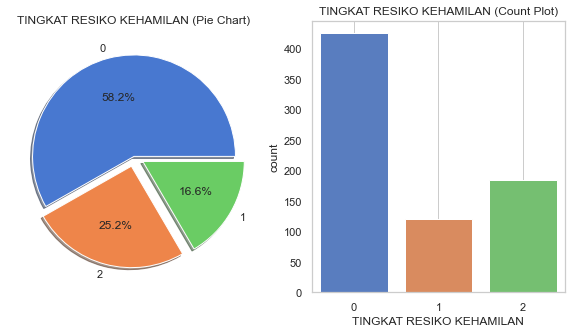

In [2661]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplots dengan 1 baris dan 2 kolom
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart
dataset['TINGKAT RESIKO KEHAMILAN'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('TINGKAT RESIKO KEHAMILAN (Pie Chart)')
ax[0].set_ylabel('')

# Count plot
sns.countplot('TINGKAT RESIKO KEHAMILAN', data=dataset, ax=ax[1])
ax[1].set_title('TINGKAT RESIKO KEHAMILAN (Count Plot)')

# Menampilkan nilai count untuk setiap kategori
N, P, Q = dataset['TINGKAT RESIKO KEHAMILAN'].value_counts()
print('Tidak Beresiko (0):', N)
print('Beresiko (1):', P)
print('Sangat Beresiko (2):', Q)

plt.grid()
plt.show()

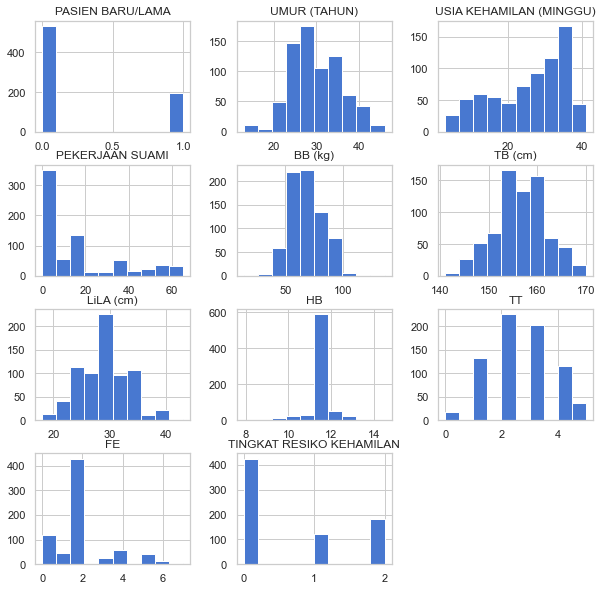

In [2662]:
dataset.hist(bins=10,figsize=(10,10))
plt.show()

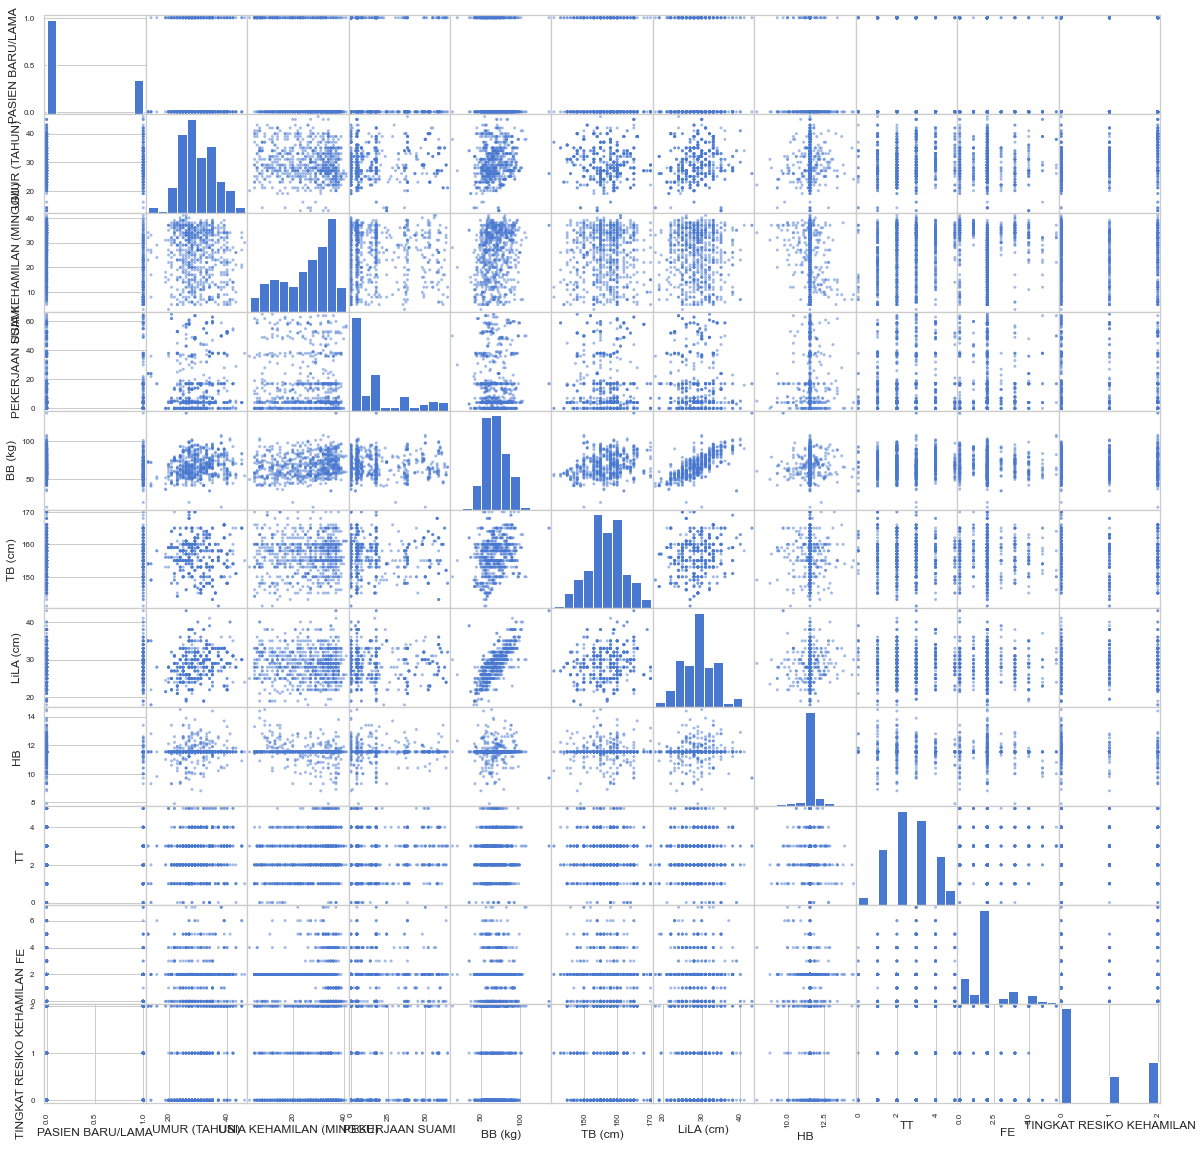

In [2663]:
#Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

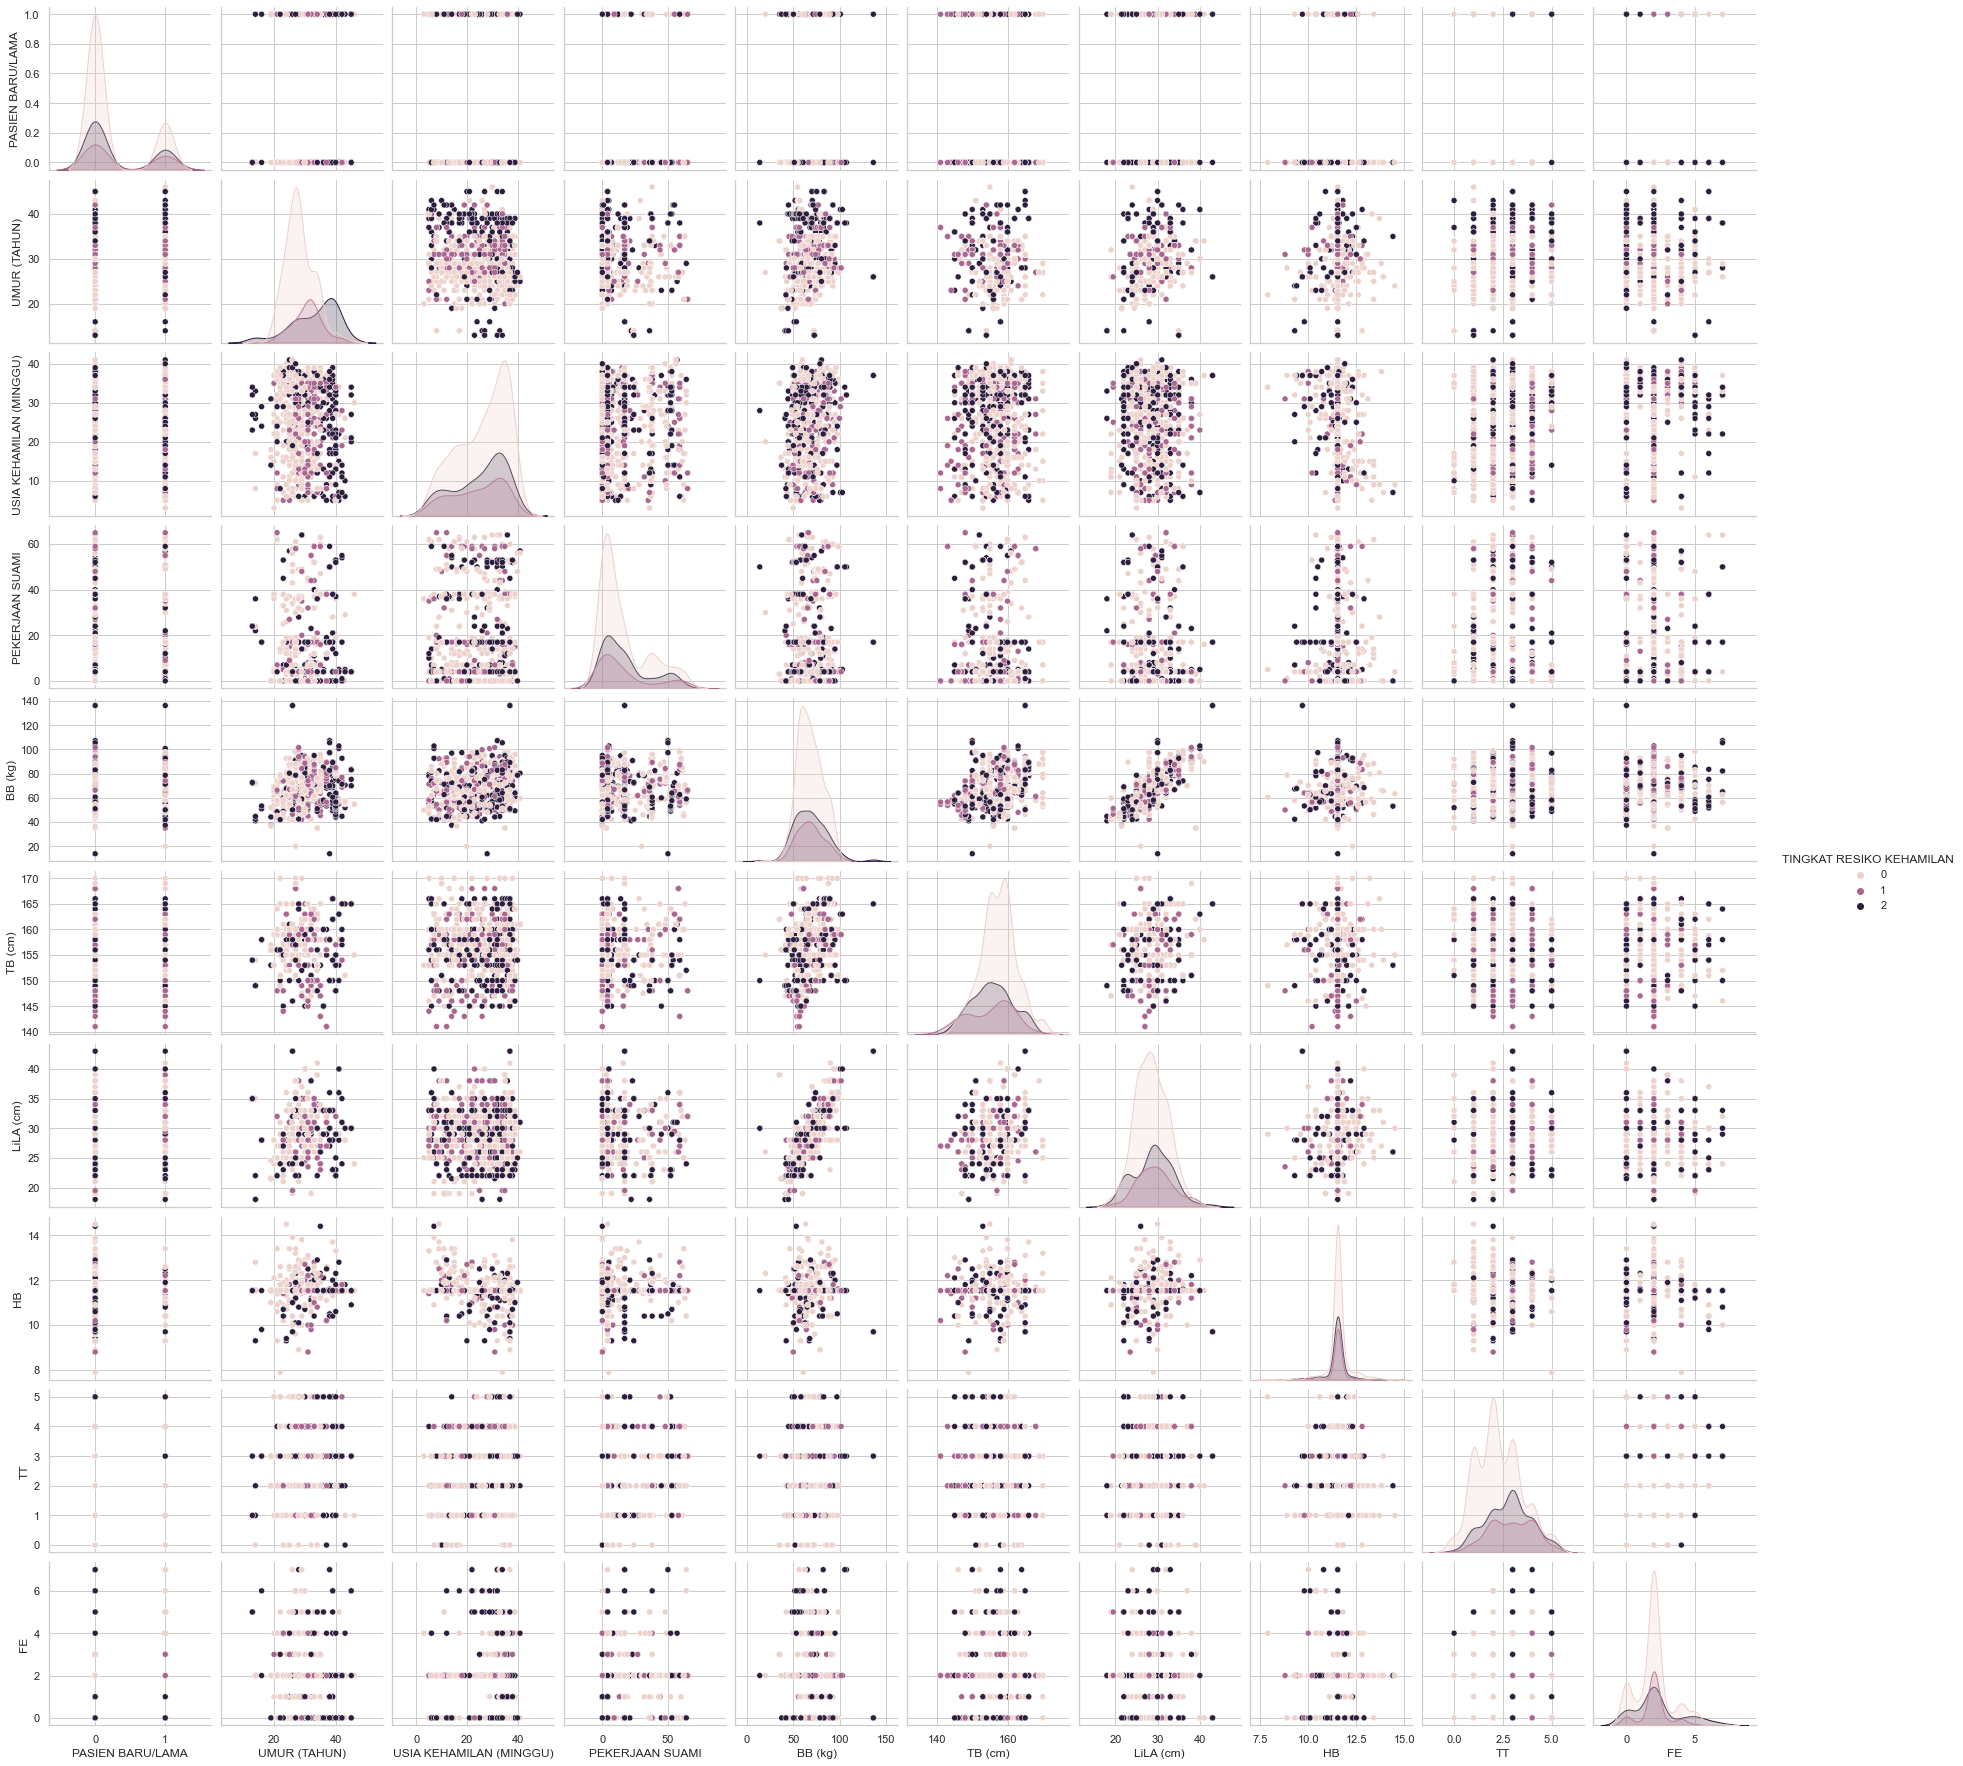

In [2664]:
# Pairplot
sns.pairplot(data = dataset, hue = 'TINGKAT RESIKO KEHAMILAN')
plt.show()

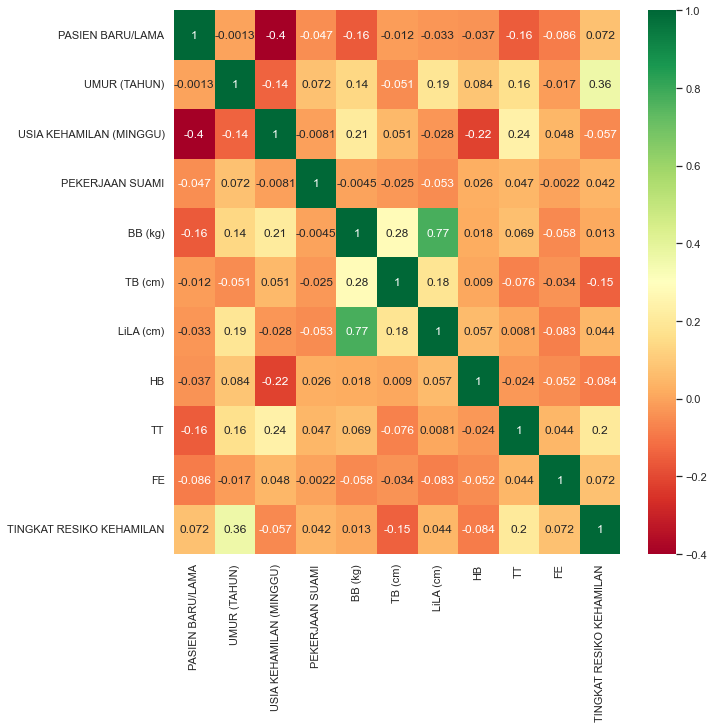

In [2665]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

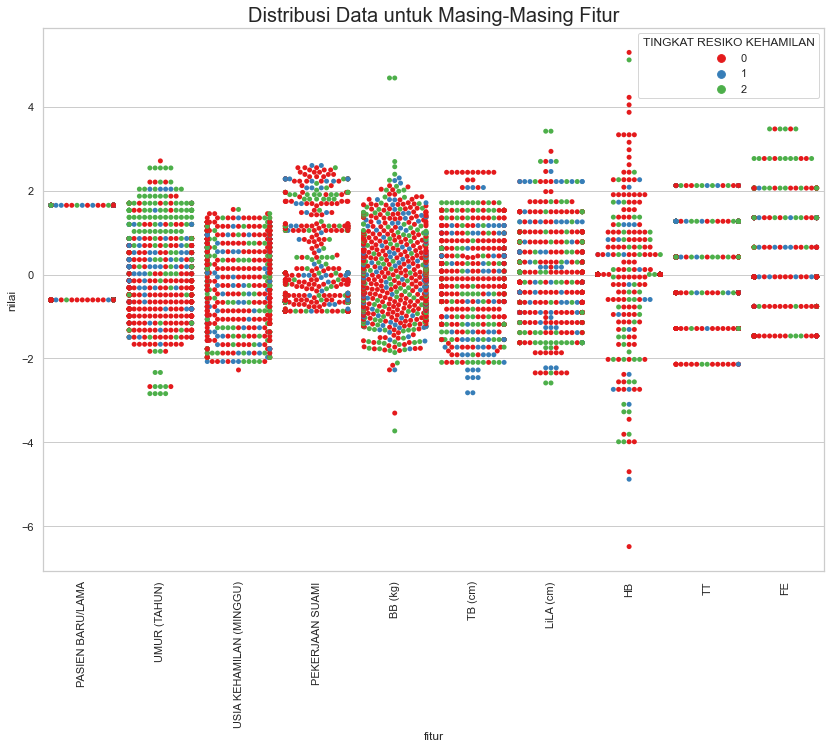

In [2666]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted')

# Split the data into keterangan and features
data_keterangan = dataset['TINGKAT RESIKO KEHAMILAN']
data_features = dataset.drop(['TINGKAT RESIKO KEHAMILAN'], axis=1)

# Standardize the features
data_features_std = (data_features - data_features.mean()) / data_features.std()

# Combine the keterangan and standardized features
data = pd.concat([data_keterangan, data_features_std], axis=1)

# Melt the data for visualization
data = pd.melt(data, id_vars='TINGKAT RESIKO KEHAMILAN', var_name='fitur', value_name='nilai')

# Set the hue order to handle 3 classes
hue_order = [0, 1, 2]

# Plot the swarm plot
plt.figure(figsize=(14, 10))
sns.swarmplot(x='fitur', y='nilai', hue='TINGKAT RESIKO KEHAMILAN', data=data, palette='Set1', hue_order=hue_order)
plt.xticks(rotation=90)
plt.title('Distribusi Data untuk Masing-Masing Fitur', fontsize=20)
plt.show()

## Build Model

## Normalize Data

In [2667]:
target_name = 'TINGKAT RESIKO KEHAMILAN'
labels_dataset = dataset[target_name]
features_dataset = dataset.drop(target_name, axis=1)

In [2668]:
features_dataset

PASIEN BARU/LAMA  UMUR (TAHUN)  USIA KEHAMILAN (MINGGU)  PEKERJAAN SUAMI  \
0                   1            27                     38.0                0   
1                   0            28                     37.0                1   
2                   0            23                     38.0                0   
3                   0            24                     25.0                0   
4                   0            25                     34.0                0   
5                   0            22                     38.0                0   
6                   1            28                     11.0                0   
7                   0            32                     36.0                2   
8                   1            26                     33.0                3   
9                   1            34                     35.0                3   
10                  0            24                     39.0                0   
11                  0            34                     35.0                3   
12                  0            27                     12.0                0   
13                  1            28                     11.0                0   
14                  0            26                     29.0                4   
15                  0            24                     36.0                4   
16                  0            30                     34.0                4   
17                  0            24                     40.0                0   
18                  0            34                     33.0                5   
19                  0            27                     13.0                6   
20                  1            21                     21.0                5   
21                  0            26                     34.0                5   
22                  0            26                     31.0                5   
24                  0            26                     34.0                5   
27                  0            25                     18.0                5   
28                  0            24                     37.0                7   
29                  0            27                     30.0                7   
30                  0            27                     21.0                5   
31                  0            25                     37.0                5   
32                  0            22                     31.0                5   
33                  0            34                     34.0                8   
34                  0            27                     15.0                7   
35                  0            32                     37.0                2   
37                  1            24                     35.0                0   
38                  1            29                     11.0                5   
39                  0            33                     15.0                7   
40                  0            32                     38.0                2   
41                  0            24                     38.0                3   
42                  0            30                     36.0                3   
43                  0            27                     35.0                3   
44                  0            32                     30.0                9   
46                  1            35                     20.0                7   
47                  0            32                     26.0                5   
48                  0            24                     37.0                7   
49                  0            43                     10.0                5   
50                  0            23                     27.0                5   
51                  1            24                     20.0                7   
52                  1            25                      6.0               10   
53                  0            25 

In [2669]:
labels_dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
24     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
46     2
47     1
48     0
49     2
50     0
51     0
52     0
53     0
54     0
56     0
57     0
58     0
59     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     1
72     2
73     0
74     1
75     1
76     0
77     1
78     0
79     0
80     2
81     0
82     0
83     1
84     0
85     0
86     1
87     0
88     0
89     0
90     0
92     0
94     0
95     0
96     0
97     0
98     0
99     0
100    1
101    0
102    0
103    0
104    2
105    0
106    0
107    0
108    2
109    0
110    0
111    0
112    0
113    2
114    2
115    0
116    2
117    2
118    0
119    0
1

In [2670]:
from sklearn.preprocessing import MinMaxScaler

features_dataset = MinMaxScaler().fit_transform(features_dataset)

## Train Test Split

In [2671]:
from sklearn.model_selection import train_test_split

random_seed = 26
train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=random_seed
)

In [2672]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_features, train_labels)

GaussianNB()

In [2673]:
train_score_c4 = nb.score(train_features, train_labels)
test_score_c4 = nb.score(test_features, test_labels)

print(f"Classical Naive Bayes on the training dataset: {train_score_c4:.2f}")
print(f"Classical Naive Bayes on the test dataset:     {test_score_c4:.2f}")

Classical Naive Bayes on the training dataset: 0.67
Classical Naive Bayes on the test dataset:     0.78


## Prediction

In [2674]:
nb_pred = nb.predict(test_features)

In [2675]:
from sklearn.metrics import accuracy_score

## Evaluation Model

In [2676]:
#Train score & Test score of Naive-Bayes
print("Train Accuracy of Naive Bayes", nb.score(train_features, train_labels)*100)
print("Accuracy (Test) score of Naive Bayes", nb.score(test_features, test_labels)*100)
print("Accuracy score of Naive Bayes", accuracy_score(test_labels, nb_pred)*100)

Train Accuracy of Naive Bayes 66.95205479452055
Accuracy (Test) score of Naive Bayes 78.08219178082192
Accuracy score of Naive Bayes 78.08219178082192


## Confusion Matrix

Confusion Matrix adalah tabel yang digunakan untuk menggambarkan kinerja masalah klasifikasi.
Ini memvisualisasikan keakuratan classifier dengan membandingkan nilai prediksi dengan nilai sebenarnya.
Istilah yang digunakan dalam Confusion Matrix adalah True positive (TP), true negative (TN). positif palsu (FP) dan negatif palsu (FN)

- True Positive: Hasil yang diprediksi adalah positif, meskipun diberi label positif.

- False Positive: Hasil yang diprediksi adalah positif, meskipun diberi label negatif. Itu juga menyebut Kesalahan Tipe I.

- False Negative: Hasil yang diprediksi adalah negatif, meskipun diberi label positif. Itu juga menyebut Kesalahan Tipe II.

- True Negative: Hasil prediksi negatif, sementara itu diberi label negatif.

In [2677]:
from sklearn.metrics import classification_report,confusion_matrix
# Confusion Matrix of Naive Bayes
cm_nb = confusion_matrix(test_labels,nb_pred)
cm_nb

array([[85,  2,  5],
       [12,  8,  1],
       [12,  0, 21]], dtype=int64)

In [2678]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score

# Confusion Matrix
cm = np.array([[85, 2, 5],
               [12, 8, 1],
               [12, 0, 21]])

# True Positive (TP), False Positive (FP), False Negative (FN), True Negative (TN)
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

# Accuracy
accuracy = (TP + TN) / np.sum(cm)

# Misclassification Rate
misclassification = 1 - accuracy

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity)
recall = TP / (TP + FN)

# False Positive Rate (FPR) or Specificity
FPR = FP / (FP + TN)

# Specificity
specificity = 1 - FPR

# F1 Score
F1 = 2 * (precision * recall) / (precision + recall)

# Print evaluation results
print('Misclassification Rate: {:.2%}'.format(misclassification.mean()))
print('Precision: {:.2%}'.format(precision.mean()))
print('Recall: {:.2%}'.format(recall.mean()))
print('False Positive Rate (FPR): {:.2%}'.format(FPR.mean()))
print('Specificity: {:.2%}'.format(specificity.mean()))
print('F1 Score: {:.2%}'.format(F1.mean()))

Misclassification Rate: 14.61%
Precision: 78.59%
Recall: 64.71%
False Positive Rate (FPR): 17.12%
Specificity: 82.88%
F1 Score: 68.73%


<AxesSubplot:>

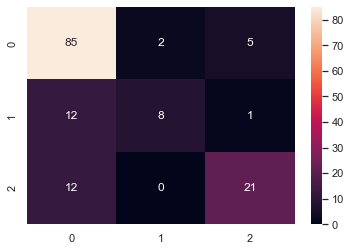

In [2679]:
sns.heatmap(confusion_matrix(test_labels,nb_pred),annot=True,fmt="d")

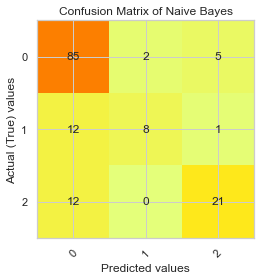

In [2680]:
plt.clf()
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Wistia) 
class_names = ['0', '1', '2']  # Daftar nama kelas
plt.title('Confusion Matrix of Naive Bayes')
plt.ylabel('Actual (True) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(cm_nb[i, j]), horizontalalignment="center", verticalalignment="center")
plt.show()

In [2681]:
print('Classification Report of Naive Bayes: \n',classification_report(test_labels, nb_pred, digits=4))

Classification Report of Naive Bayes: 
               precision    recall  f1-score   support

           0     0.7798    0.9239    0.8458        92
           1     0.8000    0.3810    0.5161        21
           2     0.7778    0.6364    0.7000        33

    accuracy                         0.7808       146
   macro avg     0.7859    0.6471    0.6873       146
weighted avg     0.7823    0.7808    0.7654       146

